In [1]:
# Import required libraries
import os
import requests
import json
import pandas as pd
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import numpy.random as rnd
import requests
from MCForecastTools import MCSimulation
import ipywidgets as widgets
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import datetime
import pandas_datareader.data as web
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
# Call the load_dotenv function
load_dotenv()

True

In [3]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
            alpaca_api_key,
            alpaca_secret_key,
            api_version = "v2")

In [42]:
# Can allow user defined with IPY Widgets 
# widgets.Dropdown(options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"], description="Select ETF")

ui= widgets.SelectMultiple(
            options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"],
            value=['AGG'],
            description='Select ETFs for analysis',
            readout= True,
            disabled=False
)
display(ui)

SelectMultiple(description='Select ETFs for analysis', index=(0,), options=('AGG', 'SPY', 'XLF', 'QQQ', 'EEM',…

In [43]:
ui= list(ui.value)
print(ui)

['QQQ', 'XLE']


In [44]:
timeframe = "1D"

today = str(datetime.datetime.today()).split()[0]

three_years_ago= str(datetime.datetime.today()- datetime.timedelta(days=1095)).split()[0]

start_date= pd.Timestamp(three_years_ago, tz="America/New_York").isoformat()

end_date= pd.Timestamp(today, tz="America/New_York").isoformat()
                       
limit_rows=1000
# Can allow user defined with IPY Widgets above 
tickers = ui

In [45]:
print("Preparing 3 years of historical data... Please wait")
alpaca_df= alpaca.get_barset(
               tickers,
               timeframe,
               limit= limit_rows,
               start = start_date,
               end = end_date
).df
display(alpaca_df.head())
display(alpaca_df.tail())

Preparing 3 years of historical data... Please wait


QQQ                                       XLE  \
                             open     high     low   close    volume   open   
time                                                                          
2018-08-23 00:00:00-04:00  180.77  182.045  180.50  180.77  18474662  74.00   
2018-08-24 00:00:00-04:00  181.39  182.630  181.36  182.48  17359533  74.46   
2018-08-27 00:00:00-04:00  183.43  184.330  183.11  184.30  20135648  74.79   
2018-08-28 00:00:00-04:00  184.80  185.020  184.22  184.59  15323822  75.23   
2018-08-29 00:00:00-04:00  184.91  186.840  184.86  186.74  21570189  75.01   

                                                           
                             high    low   close   volume  
time                                                       
2018-08-23 00:00:00-04:00  74.130  73.72  73.990  5847840  
2018-08-24 00:00:00-04:00  74.980  74.39  74.560  6942090  
2018-08-27 00:00:00-04:00  75.185  74.68  75.105  5869108  
2018-08-28 00:00:00-04:00  75.540  74.72  74.780  7782210  
2018-08-29 00:00:00-04:00  75.540  74.78  75.230  7093987

QQQ                                       XLE  \
                             open    high      low   close    volume   open   
time                                                                          
2021-08-16 00:00:00-04:00  367.67  369.02  363.700  368.97  33063369  48.75   
2021-08-17 00:00:00-04:00  366.15  367.15  363.230  365.71  41792226  48.04   
2021-08-18 00:00:00-04:00  365.18  366.62  361.865  362.20  33486908  48.00   
2021-08-19 00:00:00-04:00  360.22  365.68  359.960  363.97  43707421  46.20   
2021-08-20 00:00:00-04:00  365.05  368.14  364.740  367.75  35791235  45.37   

                                                             
                             high      low  close    volume  
time                                                         
2021-08-16 00:00:00-04:00  48.770  48.0800  48.47  23274475  
2021-08-17 00:00:00-04:00  48.790  47.5800  48.02  24119812  
2021-08-18 00:00:00-04:00  48.375  46.9501  47.02  27185532  
2021-08-19 00:00:00-04:00  46.500  45.1400  45.77  47891550  
2021-08-20 00:00:00-04:00  46.175  45.1700  45.89  29386377

In [8]:
# Set number of simulations
# Use IPY Widgets to set sims and years


In [46]:
simulations= widgets.Select(
    options=['50','100', '250', '500'],
    value='100',
    description='num of simulations',
    disabled=False
)
display(simulations)

Select(description='num of simulations', index=1, options=('50', '100', '250', '500'), value='100')

In [47]:
simulations=int(simulations.value)
print(simulations)

100


In [48]:
years=widgets.IntSlider(
    value=10,
    min=1,
    max=30,
    step=1,
    description='Years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(years)

IntSlider(value=10, continuous_update=False, description='Years:', max=30, min=1)

In [12]:
years= int(years.value)
print(years)

10


In [13]:
# set number of years and simulations from user inputs
MC_ETF = MCSimulation(
    portfolio_data = alpaca_df,
    num_simulation = simulations,
    num_trading_days = 252 * years
)

In [49]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_ETF.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996635,0.998066,0.999967,1.006234,0.994523,0.999354,1.002050,1.003159,1.003651,1.006385,...,0.996995,1.005930,0.996945,0.998542,0.999634,1.000768,1.007238,1.000907,0.999813,0.998643
2,0.994948,0.997794,1.000831,1.009299,0.996620,0.996696,0.997941,1.002643,1.005640,1.010311,...,0.995164,1.007857,0.987281,1.001696,0.995470,0.999971,1.002769,0.997561,1.002286,0.996994
3,0.991600,1.000585,1.003629,1.004184,0.998571,0.996791,1.000272,1.005112,1.012087,1.011100,...,0.991841,1.009911,0.991849,0.999528,0.989914,0.997956,1.005025,0.995536,0.999671,0.990367
4,0.990551,0.998426,1.001908,1.004716,0.991937,0.993975,1.005289,1.004048,1.011810,1.010526,...,0.990900,1.009657,0.992879,1.000131,0.990514,0.992857,1.002322,0.996555,1.000154,0.988795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.342982,1.359133,1.407575,1.733424,1.004247,1.429256,1.675403,1.578206,1.352441,1.735633,...,1.054687,1.210745,1.268791,1.232405,0.946540,0.986168,1.356181,1.805222,1.797856,1.100757
2517,1.341061,1.368888,1.397953,1.738048,1.005337,1.425780,1.672859,1.580061,1.355732,1.740039,...,1.047760,1.208531,1.269001,1.226210,0.946825,0.987359,1.353998,1.798724,1.800946,1.102564
2518,1.349967,1.363070,1.390525,1.739462,1.009019,1.430953,1.676432,1.574072,1.353248,1.738291,...,1.048348,1.208088,1.268138,1.232387,0.941202,0.990017,1.355803,1.788895,1.798132,1.100014
2519,1.344076,1.365538,1.388192,1.743919,1.006442,1.427991,1.679411,1.578090,1.357991,1.729452,...,1.051207,1.208138,1.263232,1.233688,0.938811,0.994481,1.357714,1.786011,1.792284,1.096044


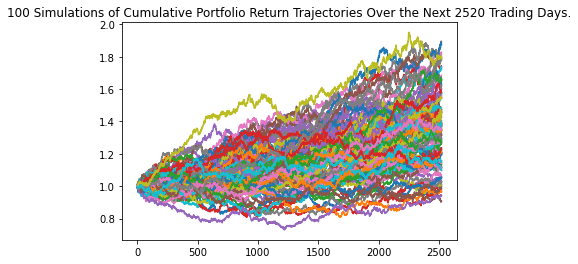

In [50]:
# Plot simulation outcomes
line_plot = MC_ETF.plot_simulation()

In [51]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_ETF.simulated_return.mean(axis=1)),
    "median": list(MC_ETF.simulated_return.median(axis=1)),
    "min": list(MC_ETF.simulated_return.min(axis=1)),
    "max": list(MC_ETF.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000278,0.999755,0.993335,1.010236
2,0.999610,0.999466,0.987281,1.013713
3,0.999805,0.999972,0.983868,1.016710
4,0.999981,0.999874,0.979647,1.014564
...,...,...,...,...
2516,1.342146,1.345430,0.908445,1.885250
2517,1.342286,1.344340,0.909482,1.895233
2518,1.342220,1.343002,0.905750,1.889130
2519,1.342585,1.342581,0.905186,1.895271


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of ETF Portfolio'}>

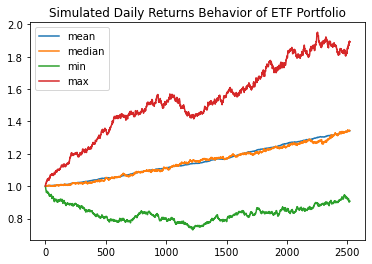

In [52]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of ETF Portfolio")

In [53]:
# Set initial investment
# Use widget to set investment amount


In [54]:
investment=widgets.IntSlider(
    value=10,
    min=1000,
    max=1000000,
    step=1000,
    description='Investment:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(investment)

IntSlider(value=1000, continuous_update=False, description='Investment:', max=1000000, min=1000, step=1000)

In [55]:
investment = int(investment.value)
print(investment)

1000


In [56]:
# Set initial investment
initial_investment = investment

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1000.277626,999.754839,993.334779,1010.236122
2,999.610069,999.466402,987.281008,1013.712904
3,999.804993,999.971676,983.867975,1016.709648
4,999.980700,999.873943,979.647143,1014.563669
...,...,...,...,...
2516,1342.146225,1345.430149,908.445240,1885.250083
2517,1342.285752,1344.340499,909.482160,1895.233041
2518,1342.220012,1343.001656,905.749688,1889.130242
2519,1342.584752,1342.580669,905.186384,1895.270689


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ETF Portfolio'}>

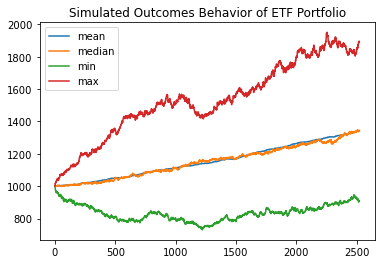

In [57]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ETF Portfolio")

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ETF.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.341704
std               0.235004
min               0.906904
25%               1.184116
50%               1.343726
75%               1.464258
max               1.891763
95% CI Lower      0.970718
95% CI Upper      1.807181
Name: 2520, dtype: float64


In [60]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ETF portfolio
# Bridge back to Widget for initial investment
ci_lower = tbl[8]* investment
ci_upper = tbl[9]* investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $1,000.00 in the portfolio over the next year will end within in the range of $970.72 and $1,807.18.


In [61]:
# Creating a DataFrame that holds the closing prices for each ETF and dropping the time component from the index
closing_prices_df= pd.DataFrame()

for ticker in tickers:
    closing_prices_df[ticker]=alpaca_df[ticker]["close"]
    
closing_prices_df.index= closing_prices_df.index.date
closing_prices_df.head()

,QQQ,XLE
2018-08-23,180.77,73.990
2018-08-24,182.48,74.560
2018-08-27,184.30,75.105
2018-08-28,184.59,74.780
2018-08-29,186.74,75.230


In [62]:
#Calculating daily returns and removing the rows of data that have missing values
daily_returns= closing_prices_df.pct_change().dropna()
daily_returns.head()

,QQQ,XLE
2018-08-24,0.009460,0.007704
2018-08-27,0.009974,0.007310
2018-08-28,0.001574,-0.004327
2018-08-29,0.011647,0.006018
2018-08-30,-0.002088,-0.003057


In [63]:
#Creates a summary data of daily returns for each ETF
daily_returns.describe()

,QQQ,XLE
count,753.000000,753.000000
mean,0.001082,-0.000302
std,0.016581,0.025629
min,-0.125748,-0.201459
25%,-0.005018,-0.011051
50%,0.001824,-0.000137
75%,0.008771,0.011357
max,0.094274,0.166525


In [64]:
# Daynamic visaulisation of daily returns for each ETF
daily_returns.hvplot.box(title= "ETF Daily Returns covering the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "ETF Ticker", size=(30,15)
)

:BoxWhisker   [Variable]   (value)

In [65]:
# Calculcates The Cumulative Returns on an investment over the period of last 3 years
cumulative_returns= (1+ daily_returns).cumprod()
cumulative_returns.tail(1)

,QQQ,XLE
2021-08-20,2.034353,0.620219


In [66]:
# Dynamic visualisation of cumulative returns of all ETFS over the period of last 3 years
cumulative_returns.hvplot(title= "Cumulative returns of all ETFS the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "Date")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [67]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
standard_deviation = daily_returns.std()
standard_deviation.sort_values()
display(standard_deviation)
print(
          f"The *least* volatile ETF is {standard_deviation.index[0]} with a Standard Deviation of: {round(standard_deviation[0], 3)}\n"
          f"The *most* volatile ETF is {standard_deviation.index[-1]} with a Standard Deviation of: {round(standard_deviation[-1], 3)}\n"
    )


QQQ    0.016581
XLE    0.025629
dtype: float64

The *least* volatile ETF is QQQ with a Standard Deviation of: 0.017
The *most* volatile ETF is XLE with a Standard Deviation of: 0.026



In [68]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
annual_standard_deviation = standard_deviation * np.sqrt(252)
annual_standard_deviation.sort_values()
display(annual_standard_deviation)
print(
          f"When annualised, The *least* volatile ETF is {annual_standard_deviation.index[0]} with a Standard Deviation of: {round(annual_standard_deviation[0], 3)}\n"
          f"When annualised, The *most* volatile ETF is {annual_standard_deviation.index[-1]} with a Standard Deviation of: {round(annual_standard_deviation[-1], 3)}\n"
    )

QQQ    0.263220
XLE    0.406849
dtype: float64

When annualised, The *least* volatile ETF is QQQ with a Standard Deviation of: 0.263
When annualised, The *most* volatile ETF is XLE with a Standard Deviation of: 0.407



<AxesSubplot:title={'center':'21-day rolling standard deviation for ETFs '}>

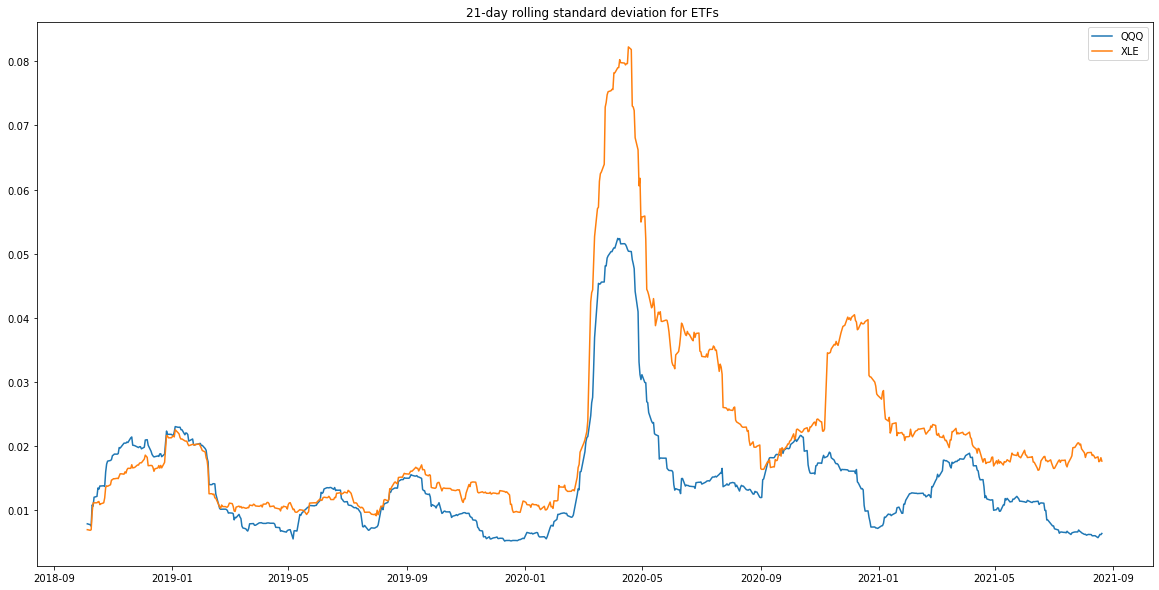

In [69]:
# Calculates and plots a 30-day rolling standard deviation for all ETFs
rolling_std = daily_returns.rolling(window = 30).std()
rolling_std.plot(figsize= (20,10), 
                 title = '21-day rolling standard deviation for ETFs ')

In [70]:

daily_returns.sum(axis=0).divide(252).sort_values()

XLE   -0.000903
QQQ    0.003232
dtype: float64

In [71]:
sharpe_ratio = (daily_returns.sum(axis=0).divide(252).sort_values())/(daily_returns.std(axis=0).sort_values())
sharpe_ratio.head()

QQQ    0.194947
XLE   -0.035243
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

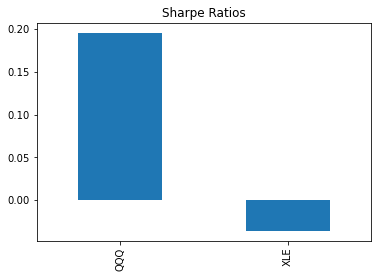

In [72]:

sharpe_ratio.plot(title="Sharpe Ratios", kind="bar")

In [73]:
start_date1 = pd.Timestamp(three_years_ago).isoformat()
end_date1 = pd.Timestamp(today).isoformat()
                       
sp500_df = web.DataReader(['sp500'], 'fred', start_date1, end_date1)
sp500_df

,sp500
DATE,
2018-08-23,2856.98
2018-08-24,2874.69
2018-08-27,2896.74
2018-08-28,2897.52
2018-08-29,2914.04
...,...
2021-08-16,4479.71
2021-08-17,4448.08
2021-08-18,4400.27


In [74]:

daily_sp500_returns_df = sp500_df.pct_change().dropna()
daily_sp500_returns_df.head()

,sp500
DATE,
2018-08-24,0.006199
2018-08-27,0.007670
2018-08-28,0.000269
2018-08-29,0.005701
2018-08-30,-0.004430


In [75]:

daily_sp500_returns_var = daily_sp500_returns_df.rolling(5).var().dropna()
daily_sp500_returns_var.head()

,sp500
DATE,
2018-08-30,0.000025
2018-08-31,0.000023
2018-09-03,0.000013
2018-09-04,0.000014
2018-09-05,0.000004


In [76]:
qqq_cov = daily_returns['QQQ'].rolling(5).cov(daily_sp500_returns_df).dropna()
display(qqq_cov.head())
xle_cov = daily_returns['XLE'].rolling(5).cov(daily_sp500_returns_df).dropna()
display(xle_cov.head())

,sp500
DATE,
2018-08-30,0.000029
2018-08-31,0.000028
2018-09-10,0.000011
2018-09-11,0.000025
2018-09-12,0.000018


,sp500
DATE,
2018-08-30,0.000027
2018-08-31,0.000026
2018-09-10,0.000009
2018-09-11,0.000025
2018-09-12,0.000026


In [77]:

qqq_beta = qqq_cov/daily_sp500_returns_var
display(qqq_beta.dropna().head())
xle_beta = xle_cov/daily_sp500_returns_var
display(xle_beta.dropna().head())

,sp500
DATE,
2018-08-30,1.147554
2018-08-31,1.182966
2018-09-10,2.340359
2018-09-11,2.396010
2018-09-12,2.002692


,sp500
DATE,
2018-08-30,1.063522
2018-08-31,1.120089
2018-09-10,2.027352
2018-09-11,2.391070
2018-09-12,2.923124


In [78]:
qqq_beta_mean = qqq_beta.rolling(5).mean().dropna()
display(qqq_beta_mean.head())
xle_beta_mean = xle_beta.rolling(5).mean().dropna()
display(xle_beta_mean.head())

,sp500
DATE,
2018-09-14,2.270421
2018-09-17,2.267302
2018-09-18,2.224034
2018-09-19,2.257502
2018-09-20,2.249822


,sp500
DATE,
2018-09-14,1.473861
2018-09-17,1.109121
2018-09-18,0.660562
2018-09-19,0.108870
2018-09-20,0.041217


<AxesSubplot:title={'center':'QQQ Beta'}, xlabel='DATE'>

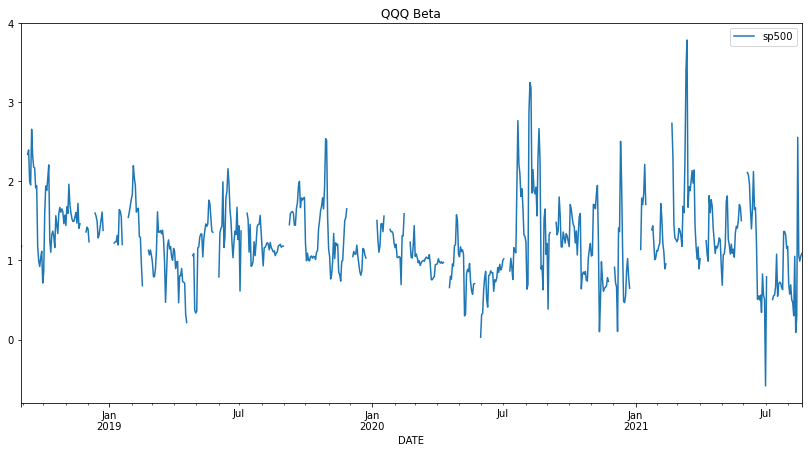

In [79]:
qqq_beta.plot(title="QQQ Beta", figsize=(14, 7))

<AxesSubplot:title={'center':'XLE Beta'}, xlabel='DATE'>

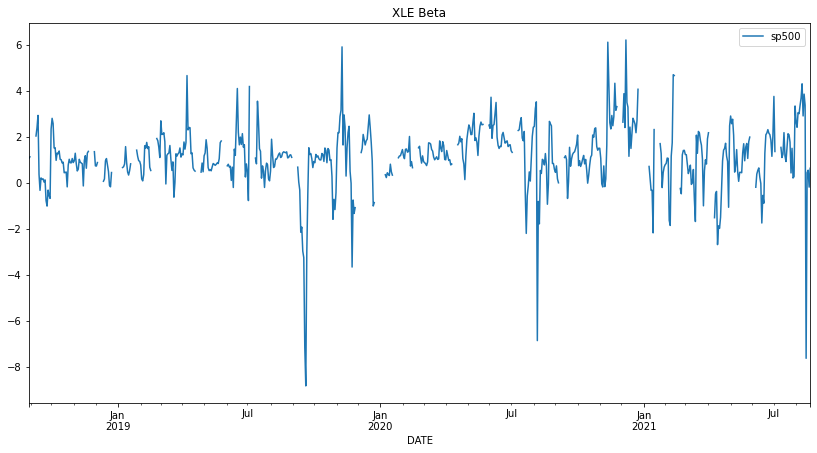

In [80]:
xle_beta.plot(title="XLE Beta", figsize=(14, 7))